In [1]:
import pandas as pd
import html5lib
from soccerplots.radar_chart import Radar
%pip install lxml

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_html("https://fbref.com/en/comps/9/shooting/Premier-League-Stats", attrs = {'id': 'stats_squads_shooting_for'})[0]
#add [0] because we just want the first item in the df list

In [3]:
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Standard            \
               Squad               # Pl                90s      Gls   Sh  SoT   
0            Arsenal                 25               36.0       83  610  199   
1        Aston Villa                 30               36.0       69  484  175   
2        Bournemouth                 30               36.0       51  504  166   
3          Brentford                 28               36.0       50  449  150   
4           Brighton                 30               35.0       48  511  190   

                                                      Expected                \
   SoT%  Sh/90 SoT/90  G/Sh G/SoT  Dist  FK  PK PKatt       xG  npxG npxG/Sh   
0  32.6  16.94   5.53  0.12  0.37  15.9   6  10    10     71.7  64.1    0.11   
1  36.2  13.44   4.86  0.13  0.37  16.1  15   4     4     59.4  56.3    0.12   
2  32.9  14.00   4.61  0.10  0.30  16.6  18   2     3     53.1  50.7    0.10   
3  33.4  12.47   4.17  0.10  0.31  15.6  16   3     3     56.0  53.8    0.12   
4  37.2  14.60   5.43  0.08  0.23  16.8  11   5     6     52.5  47.9    0.10   

                 
   G-xG np:G-xG  
0  11.3     8.9  
1   9.6     8.7  
2  -2.1    -1.7  
3  -6.0    -6.8  
4  -4.5    -4.9

In [4]:
df.columns.values

array([('Unnamed: 0_level_0', 'Squad'), ('Unnamed: 1_level_0', '# Pl'),
       ('Unnamed: 2_level_0', '90s'), ('Standard', 'Gls'),
       ('Standard', 'Sh'), ('Standard', 'SoT'), ('Standard', 'SoT%'),
       ('Standard', 'Sh/90'), ('Standard', 'SoT/90'),
       ('Standard', 'G/Sh'), ('Standard', 'G/SoT'), ('Standard', 'Dist'),
       ('Standard', 'FK'), ('Standard', 'PK'), ('Standard', 'PKatt'),
       ('Expected', 'xG'), ('Expected', 'npxG'), ('Expected', 'npxG/Sh'),
       ('Expected', 'G-xG'), ('Expected', 'np:G-xG')], dtype=object)

In [5]:
mycolumns = []
print(mycolumns)
for x in df.columns.values:
    print(x)
    y = list(x)
    print(y)
    y.remove(x[0])
    print(y)
    x = str(y)
    print(x)
    mycolumns.append(x)

    
mycolumns
df.columns = mycolumns
df.columns.values

[]
('Unnamed: 0_level_0', 'Squad')
['Unnamed: 0_level_0', 'Squad']
['Squad']
['Squad']
('Unnamed: 1_level_0', '# Pl')
['Unnamed: 1_level_0', '# Pl']
['# Pl']
['# Pl']
('Unnamed: 2_level_0', '90s')
['Unnamed: 2_level_0', '90s']
['90s']
['90s']
('Standard', 'Gls')
['Standard', 'Gls']
['Gls']
['Gls']
('Standard', 'Sh')
['Standard', 'Sh']
['Sh']
['Sh']
('Standard', 'SoT')
['Standard', 'SoT']
['SoT']
['SoT']
('Standard', 'SoT%')
['Standard', 'SoT%']
['SoT%']
['SoT%']
('Standard', 'Sh/90')
['Standard', 'Sh/90']
['Sh/90']
['Sh/90']
('Standard', 'SoT/90')
['Standard', 'SoT/90']
['SoT/90']
['SoT/90']
('Standard', 'G/Sh')
['Standard', 'G/Sh']
['G/Sh']
['G/Sh']
('Standard', 'G/SoT')
['Standard', 'G/SoT']
['G/SoT']
['G/SoT']
('Standard', 'Dist')
['Standard', 'Dist']
['Dist']
['Dist']
('Standard', 'FK')
['Standard', 'FK']
['FK']
['FK']
('Standard', 'PK')
['Standard', 'PK']
['PK']
['PK']
('Standard', 'PKatt')
['Standard', 'PKatt']
['PKatt']
['PKatt']
('Expected', 'xG')
['Expected', 'xG']
['xG']
['xG

array(["['Squad']", "['# Pl']", "['90s']", "['Gls']", "['Sh']", "['SoT']",
       "['SoT%']", "['Sh/90']", "['SoT/90']", "['G/Sh']", "['G/SoT']",
       "['Dist']", "['FK']", "['PK']", "['PKatt']", "['xG']", "['npxG']",
       "['npxG/Sh']", "['G-xG']", "['np:G-xG']"], dtype=object)

In [6]:
df.columns.values

array(["['Squad']", "['# Pl']", "['90s']", "['Gls']", "['Sh']", "['SoT']",
       "['SoT%']", "['Sh/90']", "['SoT/90']", "['G/Sh']", "['G/SoT']",
       "['Dist']", "['FK']", "['PK']", "['PKatt']", "['xG']", "['npxG']",
       "['npxG/Sh']", "['G-xG']", "['np:G-xG']"], dtype=object)

In [7]:
df.head()

,['Squad'],['# Pl'],['90s'],['Gls'],['Sh'],['SoT'],['SoT%'],['Sh/90'],['SoT/90'],['G/Sh'],['G/SoT'],['Dist'],['FK'],['PK'],['PKatt'],['xG'],['npxG'],['npxG/Sh'],['G-xG'],['np:G-xG']
0,Arsenal,25,36.0,83,610,199,32.6,16.94,5.53,0.12,0.37,15.9,6,10,10,71.7,64.1,0.11,11.3,8.9
1,Aston Villa,30,36.0,69,484,175,36.2,13.44,4.86,0.13,0.37,16.1,15,4,4,59.4,56.3,0.12,9.6,8.7
2,Bournemouth,30,36.0,51,504,166,32.9,14.00,4.61,0.10,0.30,16.6,18,2,3,53.1,50.7,0.10,-2.1,-1.7
3,Brentford,28,36.0,50,449,150,33.4,12.47,4.17,0.10,0.31,15.6,16,3,3,56.0,53.8,0.12,-6.0,-6.8
4,Brighton,30,35.0,48,511,190,37.2,14.60,5.43,0.08,0.23,16.8,11,5,6,52.5,47.9,0.10,-4.5,-4.9


In [8]:
newColumns = []
for i in df.columns.values:
    y = i.translate({ord(y): None for y in '[\']'})
    print(y)
    newColumns.append(y)

df.columns = newColumns
#print(s.translate({ord(i): None for i in 'abc'}))

Squad
# Pl
90s
Gls
Sh
SoT
SoT%
Sh/90
SoT/90
G/Sh
G/SoT
Dist
FK
PK
PKatt
xG
npxG
npxG/Sh
G-xG
np:G-xG


In [9]:
df.columns.values

array(['Squad', '# Pl', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90',
       'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'], dtype=object)

In [10]:
df.head()

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Arsenal,25,36.0,83,610,199,32.6,16.94,5.53,0.12,0.37,15.9,6,10,10,71.7,64.1,0.11,11.3,8.9
1,Aston Villa,30,36.0,69,484,175,36.2,13.44,4.86,0.13,0.37,16.1,15,4,4,59.4,56.3,0.12,9.6,8.7
2,Bournemouth,30,36.0,51,504,166,32.9,14.00,4.61,0.10,0.30,16.6,18,2,3,53.1,50.7,0.10,-2.1,-1.7
3,Brentford,28,36.0,50,449,150,33.4,12.47,4.17,0.10,0.31,15.6,16,3,3,56.0,53.8,0.12,-6.0,-6.8
4,Brighton,30,35.0,48,511,190,37.2,14.60,5.43,0.08,0.23,16.8,11,5,6,52.5,47.9,0.10,-4.5,-4.9


In [11]:
df.Squad

0             Arsenal
1         Aston Villa
2         Bournemouth
3           Brentford
4            Brighton
5             Burnley
6             Chelsea
7      Crystal Palace
8             Everton
9              Fulham
10          Liverpool
11         Luton Town
12    Manchester City
13     Manchester Utd
14      Newcastle Utd
15    Nott'ham Forest
16      Sheffield Utd
17          Tottenham
18           West Ham
19             Wolves
Name: Squad, dtype: object

In [12]:
df = df[(df['Squad'] == "Arsenal") | (df['Squad'] == "Tottenham")]

In [13]:
df.head()

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Arsenal,25,36.0,83,610,199,32.6,16.94,5.53,0.12,0.37,15.9,6,10,10,71.7,64.1,0.11,11.3,8.9
17,Tottenham,28,35.0,64,533,184,34.5,15.23,5.26,0.12,0.34,16.6,10,2,2,60.7,59.2,0.11,3.3,2.8


In [14]:
df = df.reset_index()

In [15]:
#get parameters
params = list(df.columns)
params = params[2:]
params

['# Pl',
 '90s',
 'Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'FK',
 'PK',
 'PKatt',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']

In [16]:
#ranges
#add ranges to list of tuple pairs
#create empty lists

ranges = []
a_values = []
b_values = []


for x in params:
    print(x)
    a = min(df[params][x])
    print(a)
    a = a - (a*0.25)

    b = max(df[params][x])
    b = b + (b*0.25)

    ranges.append((a,b))

#values
for x in range(len(df['Squad'])):
    if df['Squad'][x] == 'Arsenal':
        a_values = df.iloc[x].values.tolist()
    if df['Squad'][x] == 'Tottenham':
        b_values = df.iloc[x].values.tolist()

a_values = a_values[2:]
b_values = b_values[2:]
values = [a_values, b_values]

# Pl
25
90s
35.0
Gls
64
Sh
533
SoT
184
SoT%
32.6
Sh/90
15.23
SoT/90
5.26
G/Sh
0.12
G/SoT
0.34
Dist
15.9
FK
6
PK
2
PKatt
2
xG
60.7
npxG
59.2
npxG/Sh
0.11
G-xG
3.3
np:G-xG
2.8


In [17]:
values

[[25,
  36.0,
  83,
  610,
  199,
  32.6,
  16.94,
  5.53,
  0.12,
  0.37,
  15.9,
  6,
  10,
  10,
  71.7,
  64.1,
  0.11,
  11.3,
  8.9],
 [28,
  35.0,
  64,
  533,
  184,
  34.5,
  15.23,
  5.26,
  0.12,
  0.34,
  16.6,
  10,
  2,
  2,
  60.7,
  59.2,
  0.11,
  3.3,
  2.8]]

In [18]:
#title 

title = dict(
    title_name = 'Arsenal',
    title_color = 'red',
    title_name_2 = 'Spurs',
    title_color_2 = 'blue',
    title_fontsize = 18)
endnote = '\n mossystats'

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

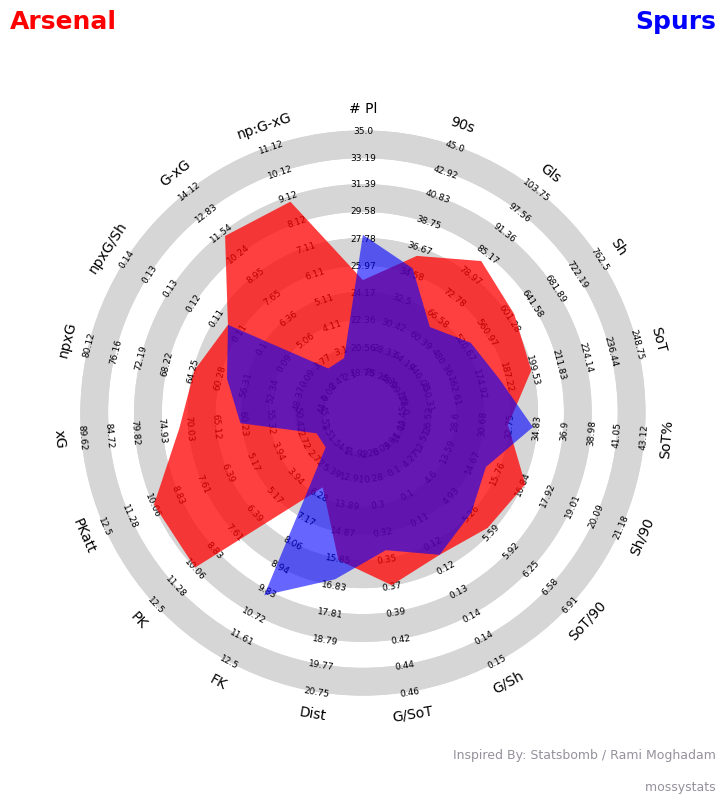

In [19]:
radar = Radar()
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                          radar_color = ['red','blue'],
                           alphas=[0.75, 0.6], title=title, endnote=endnote, filename="ArsenalVSpursShooting.jpg", dpi=500, compare=True)